In [1]:
import pandas as pd
import numpy as np
import modeltest as deep
import experiment as exp
import myutil as util
from itertools import product

from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

import importlib
importlib.reload(deep)
importlib.reload(exp)

<module 'experiment' from 'c:\\Users\\kyeongtaek\\generative_model\\hggis_boson\\experiment.py'>

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9230743408700549378
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 22712156160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6960930828890159243
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [3]:

#파일 읽기
filepath_german_csv = 'training.csv'
d_german_df = pd.read_csv(filepath_german_csv)

#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            #dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

train = label_encoder(d_german_df, make_label_map(d_german_df))
train.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,1
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,1
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1


In [4]:
#numpy 변환
d_german_np = np.array(train)

# sample 수, 특징 수 등 계산
n_row = d_german_np.shape[0]
n_features = d_german_np.shape[1]-1

# 입력과 출력 데이터 분리
x = d_german_np[:, :n_features]
y = d_german_np[:, n_features]

#정규화
x_norm = (x - np.min(x,0))/ (np.max(x,0) - np.min(x,0))
y_norm = (y - np.min(y,0))/ (np.max(y,0) - np.min(y,0))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       250000 non-null  int64  
 1   1       250000 non-null  float64
 2   2       250000 non-null  float64
 3   3       250000 non-null  float64
 4   4       250000 non-null  float64
 5   5       250000 non-null  float64
 6   6       250000 non-null  float64
 7   7       250000 non-null  float64
 8   8       250000 non-null  float64
 9   9       250000 non-null  float64
 10  10      250000 non-null  float64
 11  11      250000 non-null  float64
 12  12      250000 non-null  float64
 13  13      250000 non-null  float64
 14  14      250000 non-null  float64
 15  15      250000 non-null  float64
 16  16      250000 non-null  float64
 17  17      250000 non-null  float64
 18  18      250000 non-null  float64
 19  19      250000 non-null  float64
 20  20      250000 non-null  float64
 21  21      25

782/782 [==============================] - 2s 3ms/step
0/10	 test_acc:0.81088


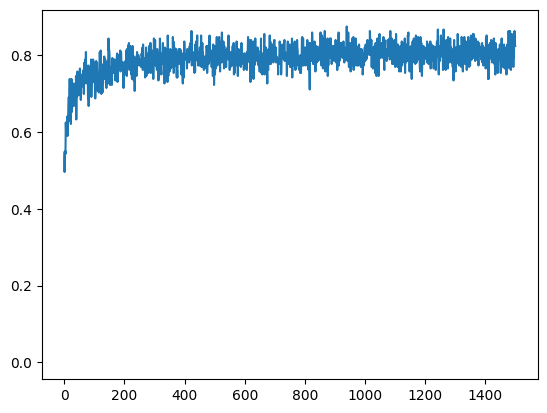

782/782 [==============================] - 2s 3ms/step
1/10	 test_acc:0.77004


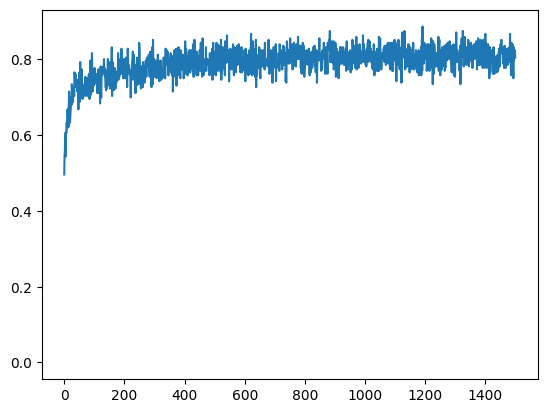

782/782 [==============================] - 2s 2ms/step
2/10	 test_acc:0.74032


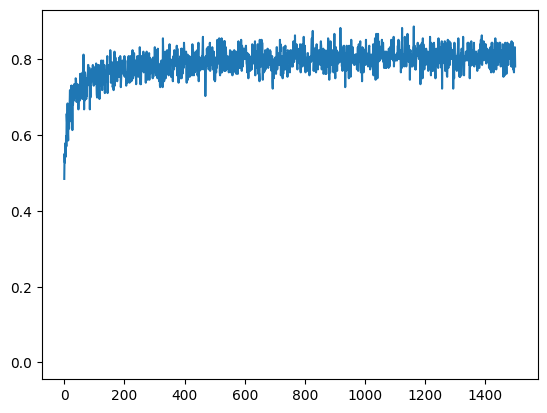

782/782 [==============================] - 2s 2ms/step
3/10	 test_acc:0.78872


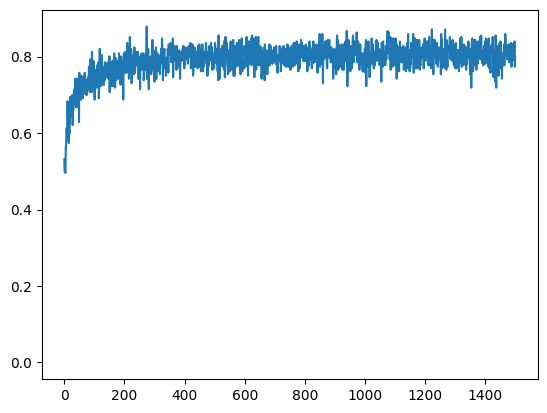

782/782 [==============================] - 2s 3ms/step
4/10	 test_acc:0.7984


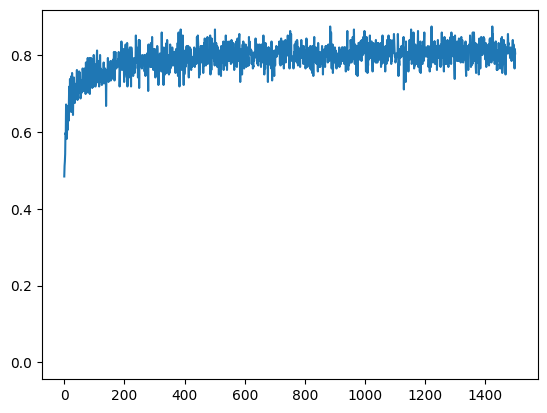

782/782 [==============================] - 2s 3ms/step
5/10	 test_acc:0.80568


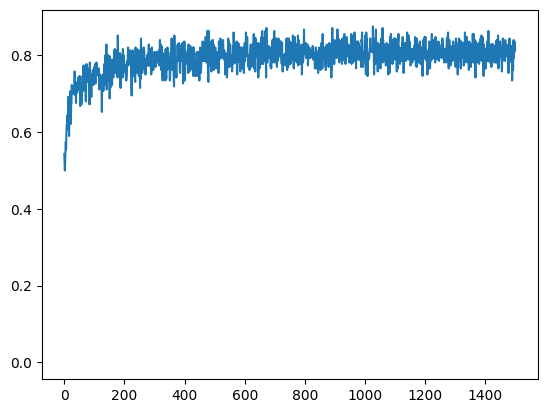

782/782 [==============================] - 2s 2ms/step
6/10	 test_acc:0.79728


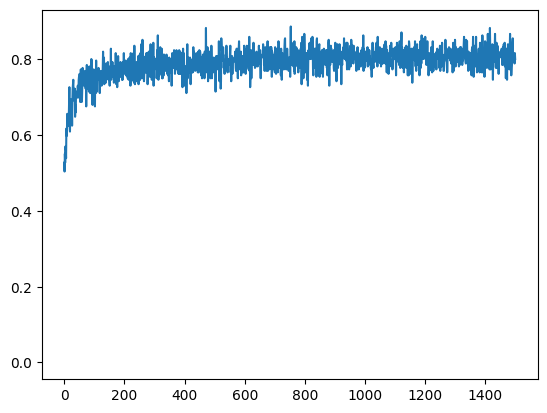

782/782 [==============================] - 2s 2ms/step
7/10	 test_acc:0.79584


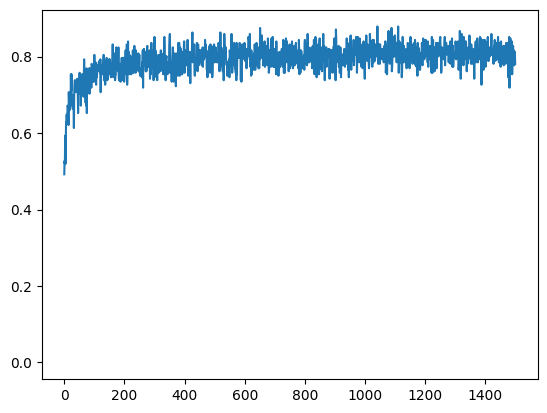

782/782 [==============================] - 2s 3ms/step
8/10	 test_acc:0.7888


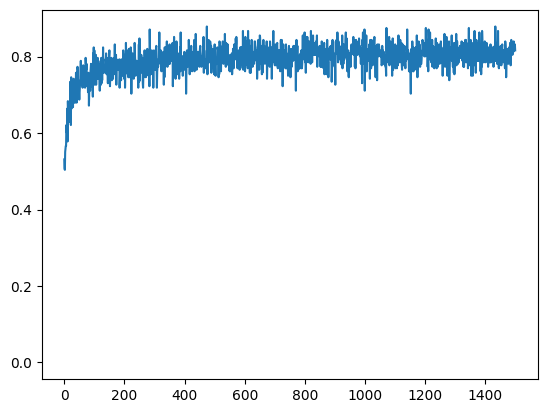

782/782 [==============================] - 2s 2ms/step
9/10	 test_acc:0.76796


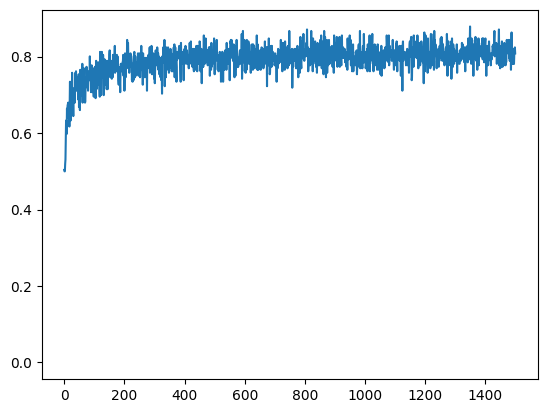

average accuracy : 0.786392
782/782 [==============================] - 2s 3ms/step
0/10	 test_acc:0.79452


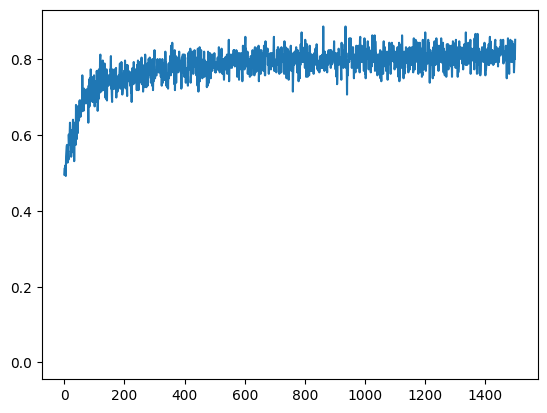

782/782 [==============================] - 2s 3ms/step
1/10	 test_acc:0.793


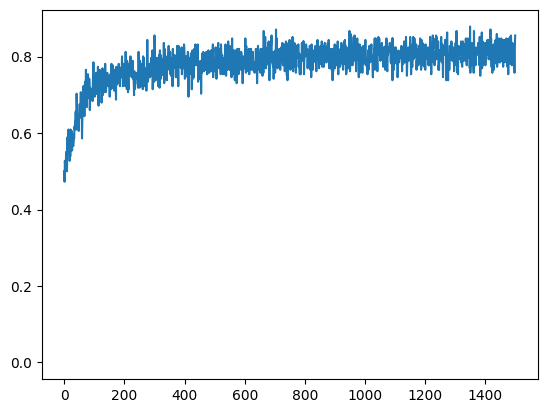

782/782 [==============================] - 2s 3ms/step
2/10	 test_acc:0.80516


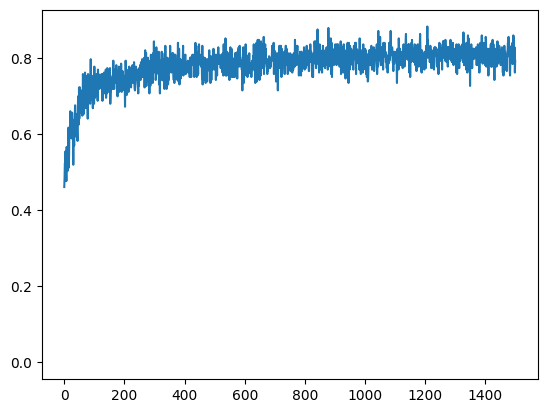

782/782 [==============================] - 2s 3ms/step
3/10	 test_acc:0.80268


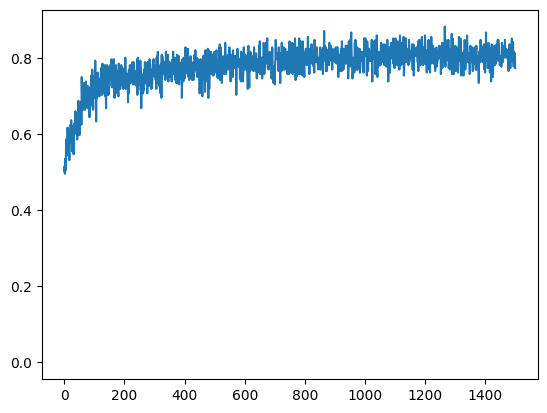

782/782 [==============================] - 2s 3ms/step
4/10	 test_acc:0.80628


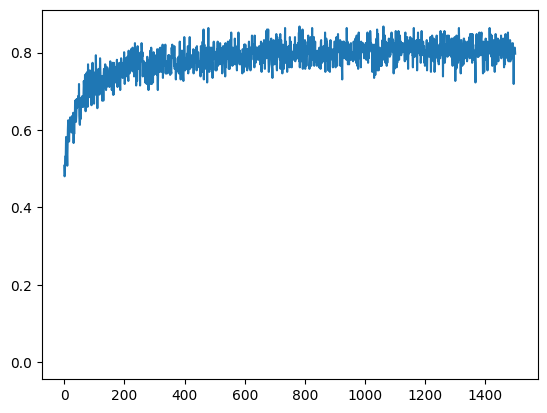

782/782 [==============================] - 2s 3ms/step
5/10	 test_acc:0.75776


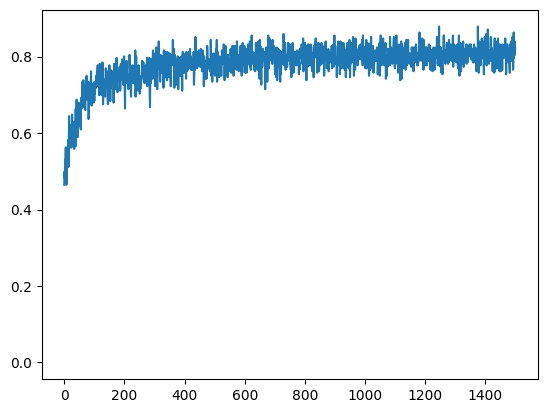

782/782 [==============================] - 2s 3ms/step
6/10	 test_acc:0.81056


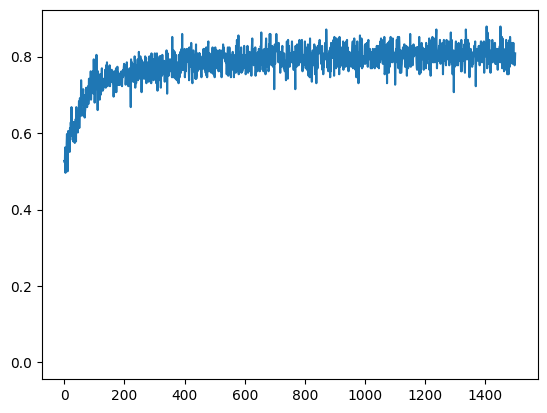

782/782 [==============================] - 2s 3ms/step
7/10	 test_acc:0.78168


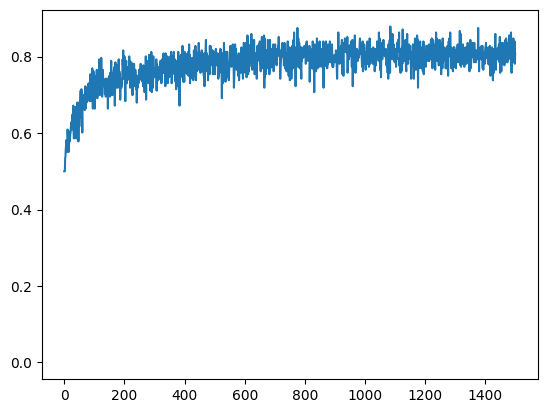

782/782 [==============================] - 2s 3ms/step
8/10	 test_acc:0.78664


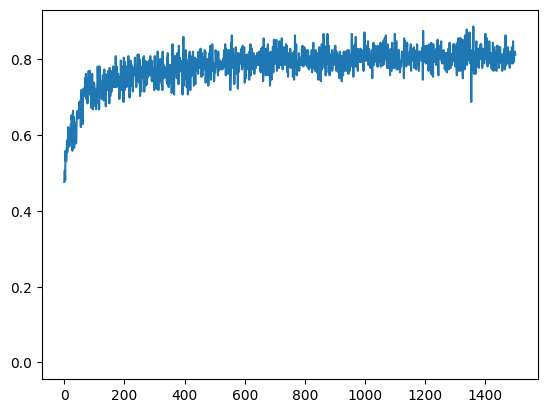

782/782 [==============================] - 2s 3ms/step
9/10	 test_acc:0.78652


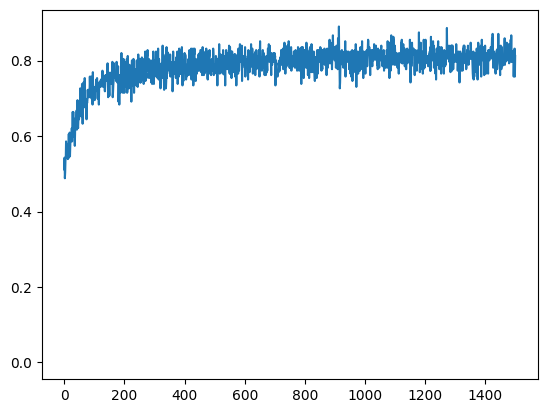

average accuracy : 0.7924800000000001
782/782 [==============================] - 2s 3ms/step
0/10	 test_acc:0.80568


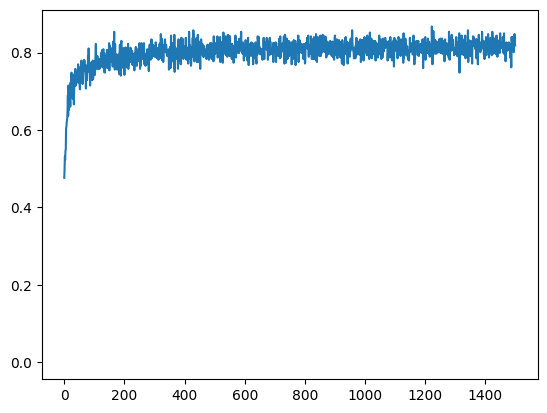

782/782 [==============================] - 2s 3ms/step
1/10	 test_acc:0.79052


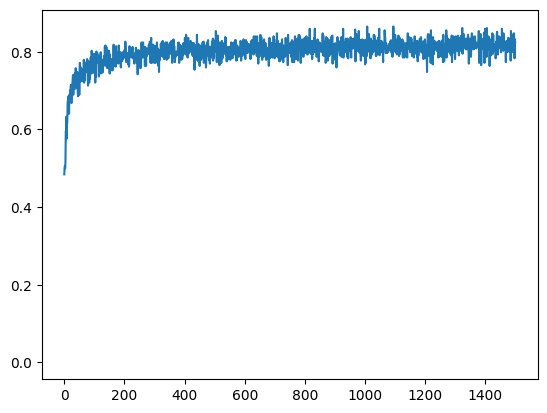

782/782 [==============================] - 2s 3ms/step
2/10	 test_acc:0.80324


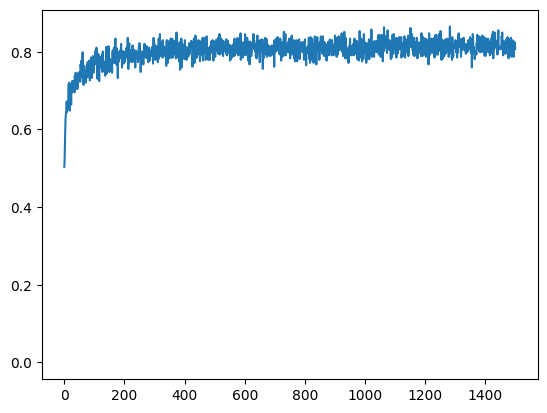

782/782 [==============================] - 2s 3ms/step
3/10	 test_acc:0.81616


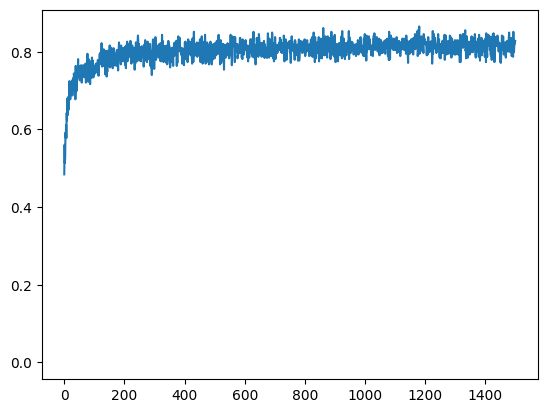

782/782 [==============================] - 2s 3ms/step
4/10	 test_acc:0.8132


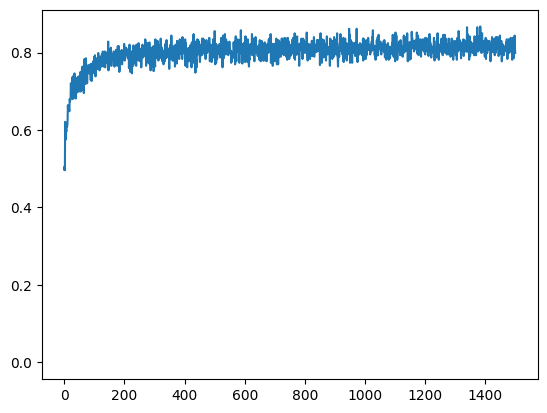

782/782 [==============================] - 2s 3ms/step
5/10	 test_acc:0.79736


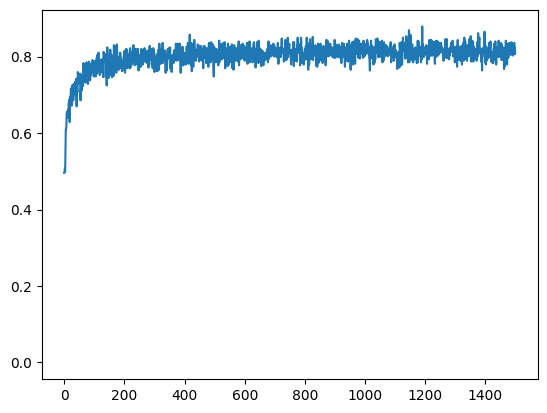

782/782 [==============================] - 2s 2ms/step
6/10	 test_acc:0.81392


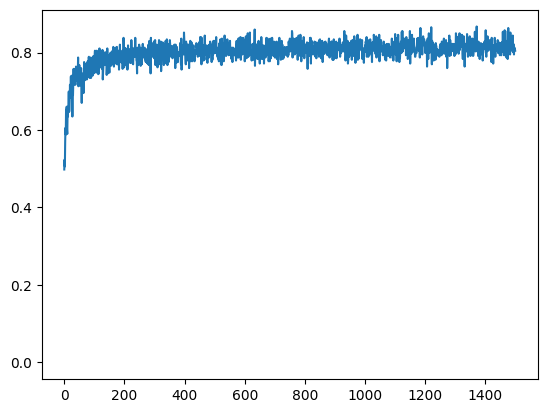

782/782 [==============================] - 2s 3ms/step
7/10	 test_acc:0.78548


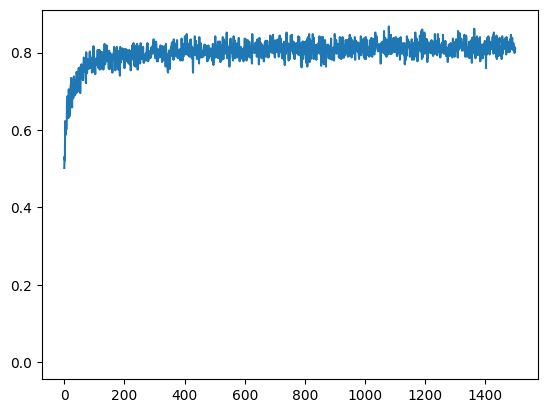

782/782 [==============================] - 2s 3ms/step
8/10	 test_acc:0.8036


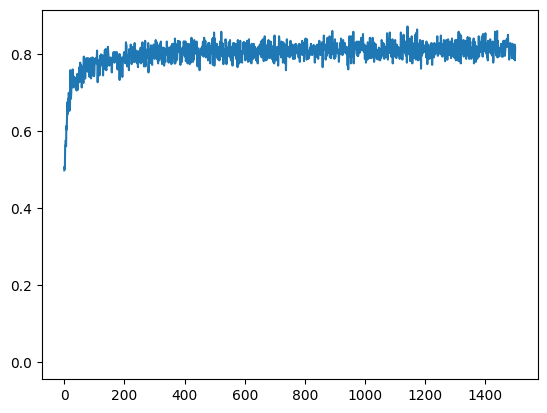

782/782 [==============================] - 2s 2ms/step
9/10	 test_acc:0.79884


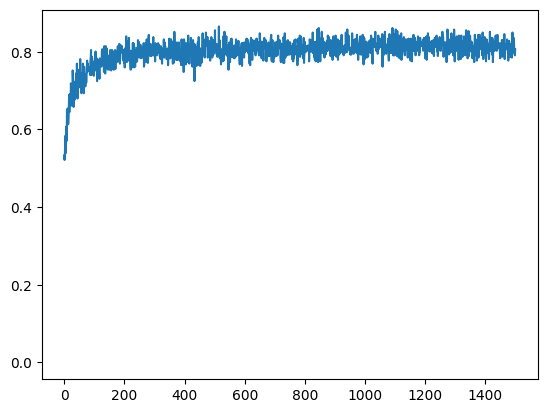

average accuracy : 0.8028000000000001
782/782 [==============================] - 2s 3ms/step
0/10	 test_acc:0.80024


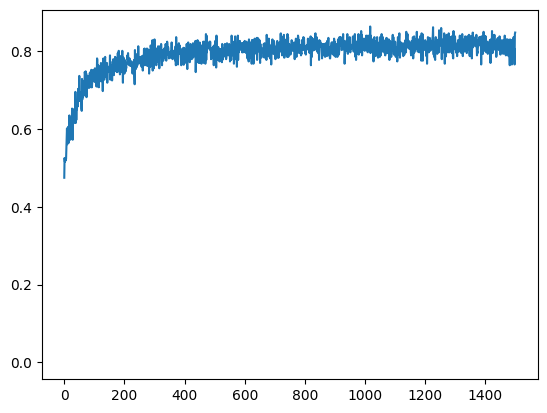

782/782 [==============================] - 2s 3ms/step
1/10	 test_acc:0.8126


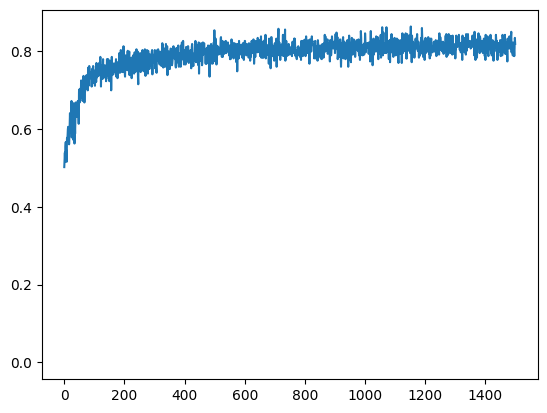

782/782 [==============================] - 2s 3ms/step
2/10	 test_acc:0.80996


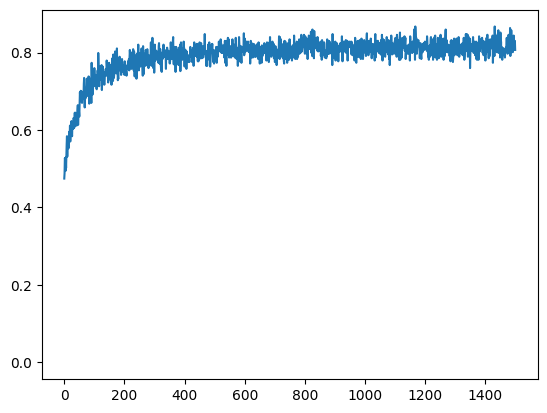

782/782 [==============================] - 2s 2ms/step
3/10	 test_acc:0.80788


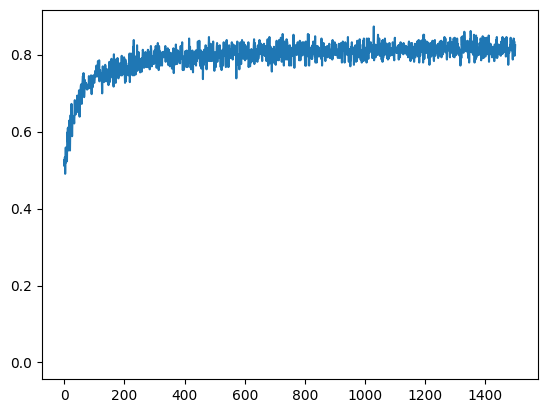

782/782 [==============================] - 2s 3ms/step
4/10	 test_acc:0.80376


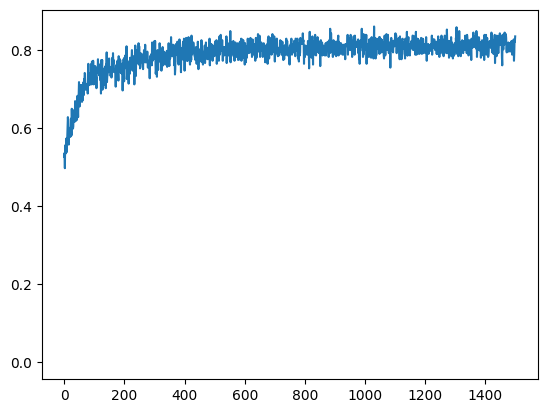

782/782 [==============================] - 2s 3ms/step
5/10	 test_acc:0.79252


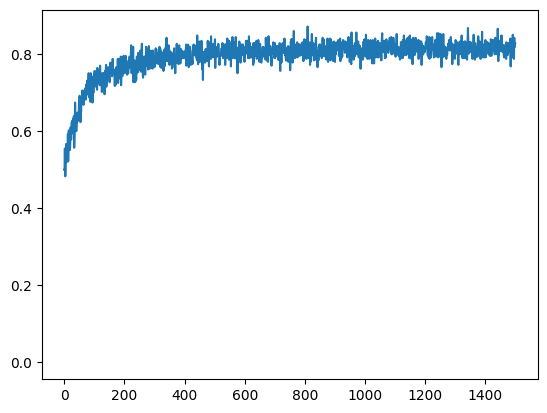

782/782 [==============================] - 2s 3ms/step
6/10	 test_acc:0.77064


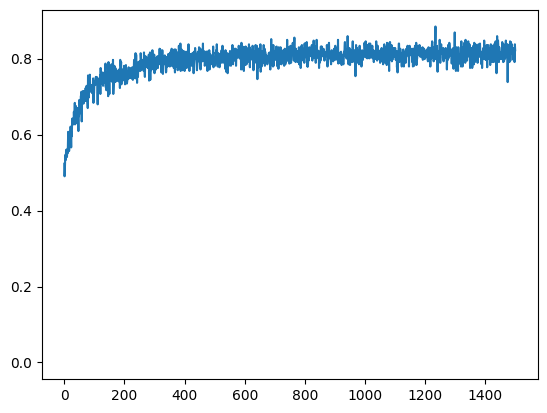

782/782 [==============================] - 2s 3ms/step
7/10	 test_acc:0.7876


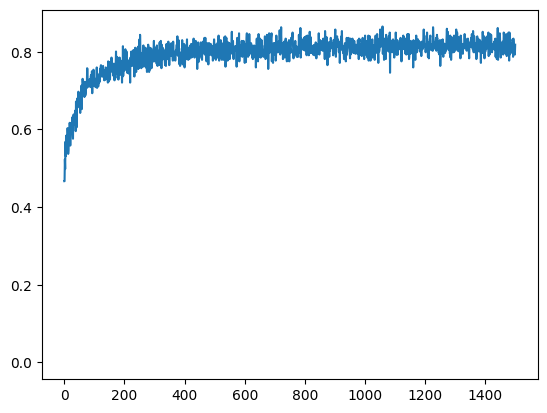

782/782 [==============================] - 2s 3ms/step
8/10	 test_acc:0.79952


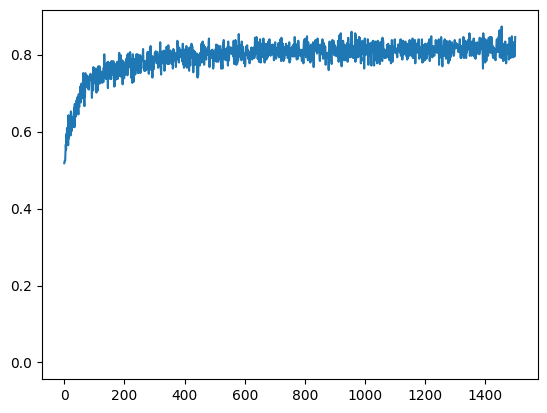

782/782 [==============================] - 2s 3ms/step
9/10	 test_acc:0.81092


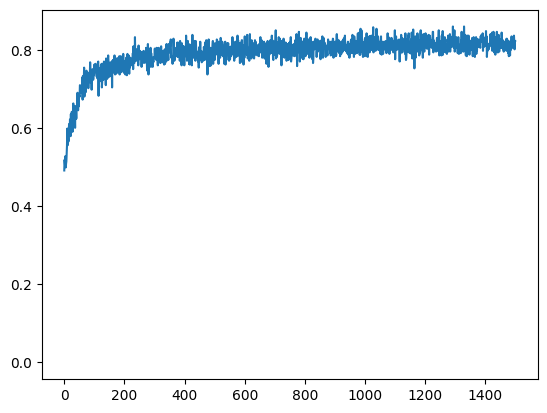

average accuracy : 0.799564
782/782 [==============================] - 2s 3ms/step
0/10	 test_acc:0.79364


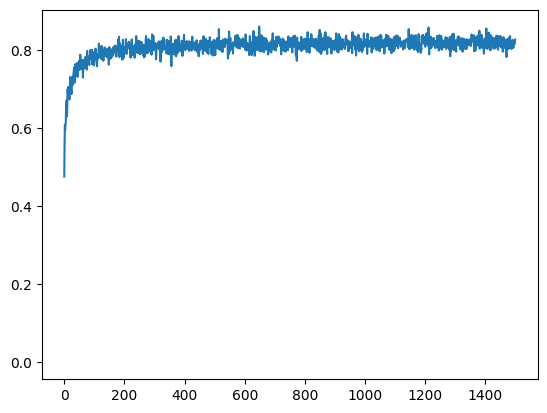

782/782 [==============================] - 2s 2ms/step
1/10	 test_acc:0.77348


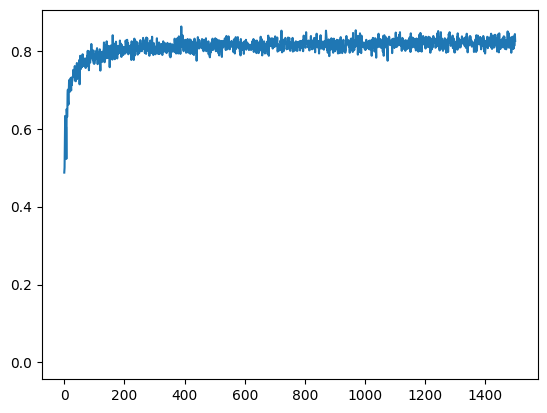

782/782 [==============================] - 2s 3ms/step
2/10	 test_acc:0.79892


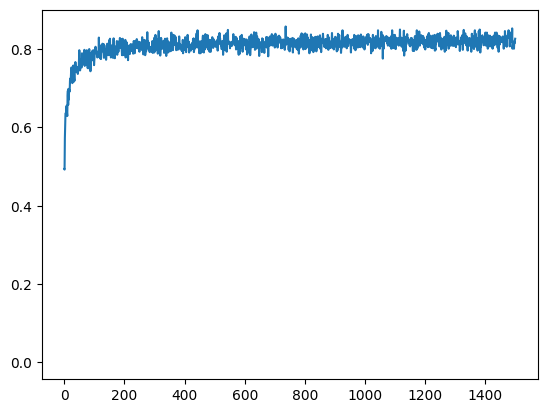

782/782 [==============================] - 2s 2ms/step
3/10	 test_acc:0.8054


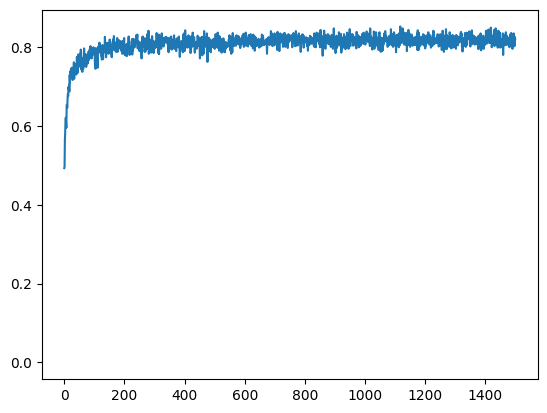

782/782 [==============================] - 2s 3ms/step
4/10	 test_acc:0.79248


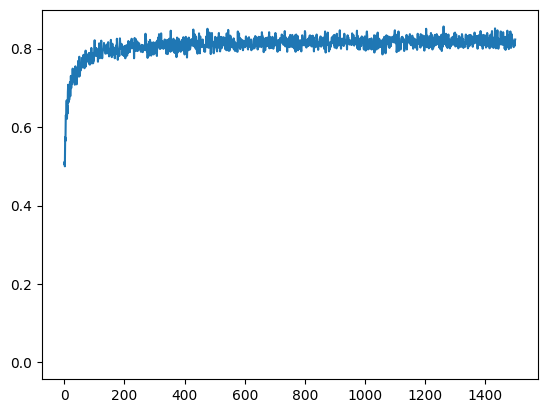

782/782 [==============================] - 2s 2ms/step
5/10	 test_acc:0.80336


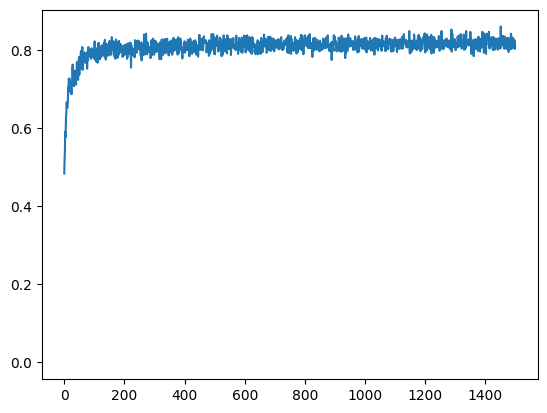

782/782 [==============================] - 2s 3ms/step
6/10	 test_acc:0.807


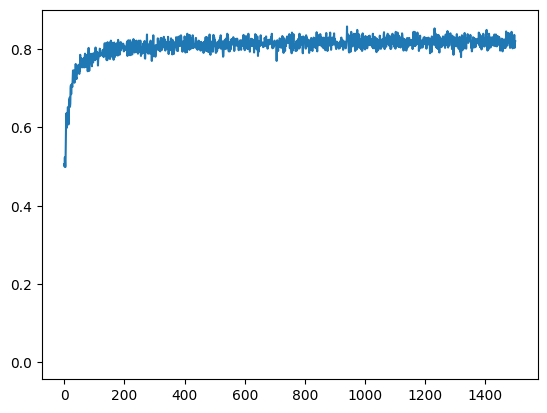

782/782 [==============================] - 2s 2ms/step
7/10	 test_acc:0.80512


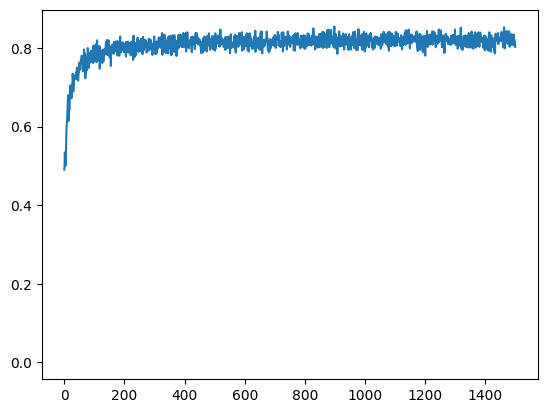

782/782 [==============================] - 2s 2ms/step
8/10	 test_acc:0.80656


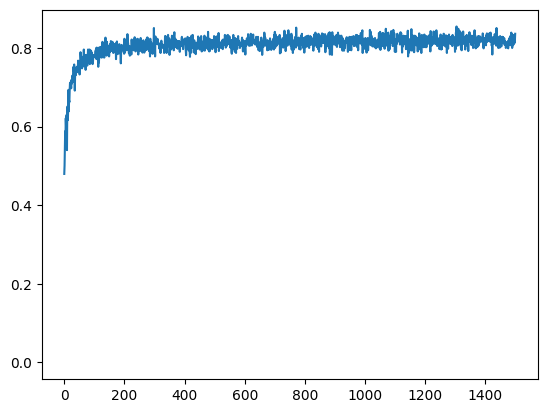

782/782 [==============================] - 2s 2ms/step
9/10	 test_acc:0.80672


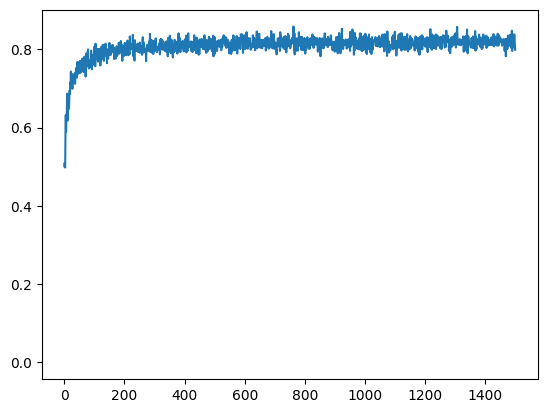

average accuracy : 0.799268
782/782 [==============================] - 2s 2ms/step
0/10	 test_acc:0.79648


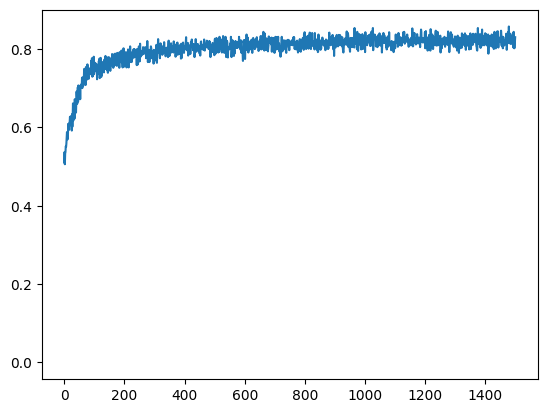

782/782 [==============================] - 2s 3ms/step
1/10	 test_acc:0.80788


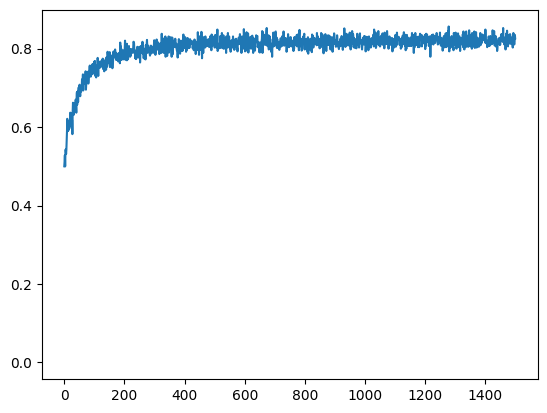

782/782 [==============================] - 2s 2ms/step
2/10	 test_acc:0.81664


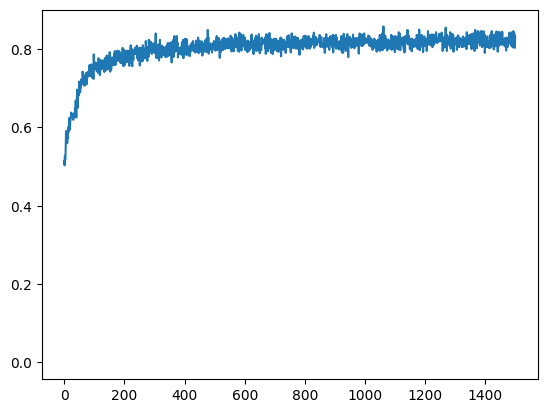

782/782 [==============================] - 2s 2ms/step
3/10	 test_acc:0.8178


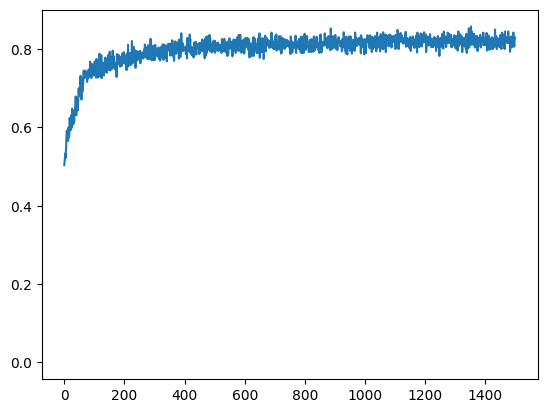

782/782 [==============================] - 2s 2ms/step
4/10	 test_acc:0.79872


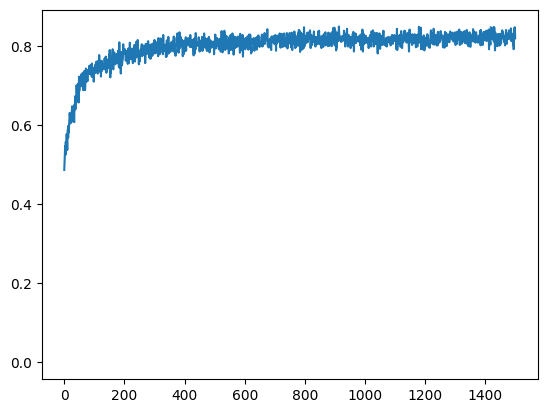

782/782 [==============================] - 2s 2ms/step
5/10	 test_acc:0.80532


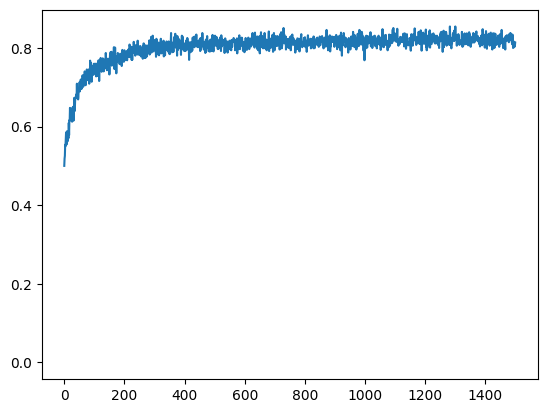

782/782 [==============================] - 2s 3ms/step
6/10	 test_acc:0.81076


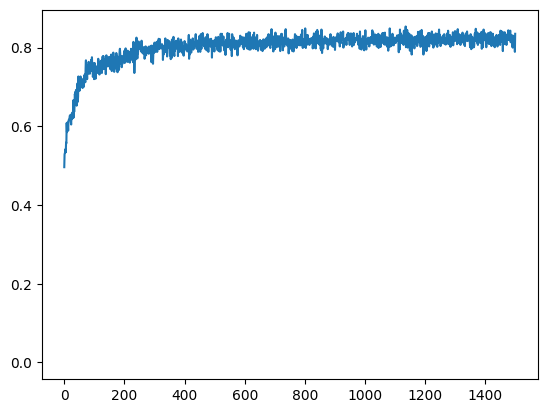

782/782 [==============================] - 2s 3ms/step
7/10	 test_acc:0.80332


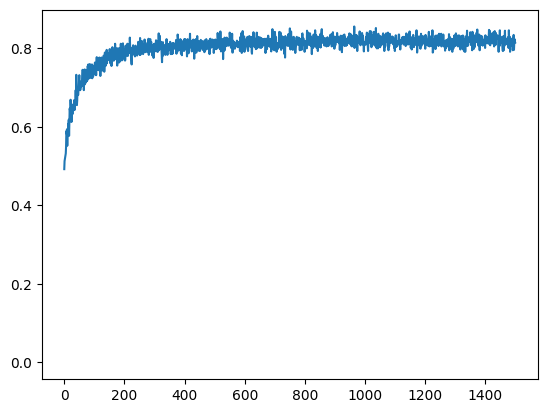

782/782 [==============================] - 2s 3ms/step
8/10	 test_acc:0.79808


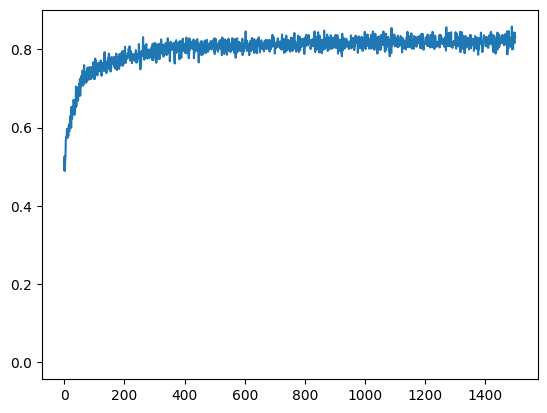

782/782 [==============================] - 2s 3ms/step
9/10	 test_acc:0.81304


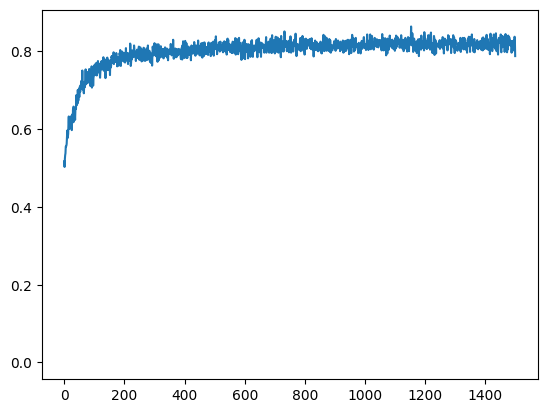

average accuracy : 0.806804
782/782 [==============================] - 2s 3ms/step
0/10	 test_acc:0.80324


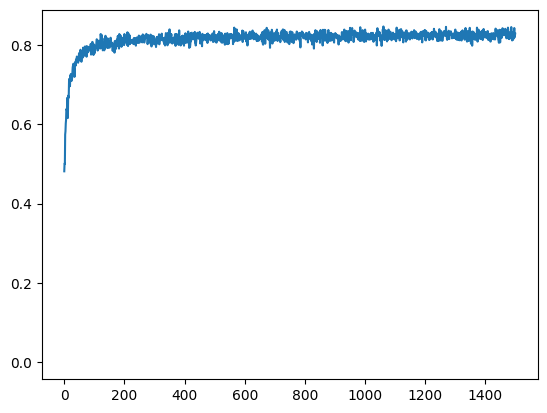

In [6]:
# 10fold validation 수행여부
bTenFoldValidation = True
if not bTenFoldValidation:  # 학습 & 테스트를 1회만 수행하는 경우
    # 데이터 분할
    [x_train, x_val, x_test, y_train, y_val, y_test] = exp.split_data(x, y, test_ratio=0.0, val_ratio=0.1)

    # 모델 불러오기 & 컴파일
    m = deep.get_model_gen(x.shape[1:])
    m.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # 학습시 사용하는 옵션
    train_options = exp.TrainParams(m, epochs=500, batch_size_per_class=32)

    # 학습
    result = exp.train_batches_with_random_selection(train_options, x_train, y_train, x_val, y_val)

    # 테스트
    if(x_test.shape[0] > 0):
        test_acc_tmp = np.sum(np.argmax(np.squeeze(result.model.predict(x_test)), -1) == y_test) / y_test.shape[0]
        print(f'test_acc:{test_acc_tmp}')
    # 결과 출력

    plt.plot(result.train_acc)
    plt.plot(result.val_acc)
    plt.show()

else:  # N fold Validation
    idx = np.array(range(n_row))
    np.random.shuffle(idx)  # 데이터 인덱스 섞기

    # hyperparameters
    
    nbatch_size = [128, 256, 512, 1024]
    nlearning_rate = [0.001, 0.0001]
    nepochs  = [1500]
    
    cols = ['batch_size', 'learning_rate', 'epochs', 'test acc']
    perform_df = pd.DataFrame(columns = cols)

    #grid search
    g_i = 0
    
    N = 10
    nClass = 2
    cm = np.zeros([N, nClass, nClass])
    
        
    for bs, lr, e in product(nbatch_size, nlearning_rate, nepochs):
        g_i += 1
        total = 0
        for i in range(N):
            # Train/Test 데이터 분할
            [x_train, x_test, y_train, y_test] = exp.split_data_for_N_fold_validation(x_norm, y, fold=N, idx=i)

            # 모델 불러오기 & 컴파일
            m = deep.get_model_gen(x.shape[1:])
            #m = deep.get_model(x.shape[1:])

            # m = deep.get_model(x.shape[1:])
            m.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])

            # 학습시 사용하는 옵션
            train_options = exp.TrainParams(m, epochs=e, batch_size_per_class=bs)

            # 학습
            result = exp.train_batches_with_random_selection(train_options, x_train, y_train, bVerbose=False)

            # 테스트
            o = np.argmax(np.squeeze(result.model.predict(x_test)), -1)
            test_acc_tmp = np.sum(o == y_test) / y_test.shape[0]
            #for j in range(y_test.shape[0]):
                #cm[i, int(y_test[j]), int(o[j])] += 1  #Confusion Matrix 계산

            # 결과 출력
            print(f'{i}/{N}\t test_acc:{test_acc_tmp}')
            plt.plot(result.train_acc)
            plt.plot(result.val_acc)
            plt.show()
            total = total + test_acc_tmp
            ave = total/10
        perform_df.loc[g_i] = [bs, lr, e, ave]
        print(f'average accuracy : {ave}')


In [15]:
perform_df = perform_df.sort_values(by='test acc')
perform_df

,batch_size,learning_rate,epochs,test acc
2,128.0,0.0001,1500.0,0.792928
8,1024.0,0.0001,1500.0,0.800712
1,128.0,0.0010,1500.0,0.802232
7,1024.0,0.0010,1500.0,0.805136
4,256.0,0.0001,1500.0,0.805600
3,256.0,0.0010,1500.0,0.806032
6,512.0,0.0001,1500.0,0.806312
5,512.0,0.0010,1500.0,0.806688


In [44]:
#파일 읽기
test_csv = 'test.csv'
test_df = pd.read_csv(test_csv)

#numpy 변환
test_np = np.array(test_df)

testnp = (test_np - np.min(test_np,0))/ (np.max(test_np,0) - np.min(test_np,0))

In [46]:
prediction = result.model.predict(testnp)

17188/17188 [==============================] - 28s 2ms/step


In [47]:
print(prediction.shape)
print(prediction)

(550000, 2)
[[0.01185783 0.9881422 ]
 [0.3214616  0.6785384 ]
 [0.81690055 0.18309945]
 ...
 [0.20876525 0.79123473]
 [0.79564714 0.20435289]
 [0.73266894 0.26733103]]


In [49]:
sub = pd.read_csv('random_submission.csv')

In [57]:
type(prediction)
pred = np.where(prediction > 0.5, 1, 0)
print(pred)
pred = np.argmax(pred, axis=1, keepdims=True)
print(pred)

[[0 1]
 [0 1]
 [1 0]
 ...
 [0 1]
 [1 0]
 [1 0]]
[[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [0]]


In [58]:
test_predict = pd.Series(pred[:,0])
test_predict

0         1
1         1
2         0
3         0
4         1
         ..
549995    1
549996    0
549997    1
549998    0
549999    0
Length: 550000, dtype: int64

In [59]:
test_predict = pd.DataFrame({"EventId":sub['EventId'],"RankOrder":sub['RankOrder'],"Class":test_predict})
test_predict = test_predict.replace(0,'s')
test_predict = test_predict.replace(1,'b')
test_predict

,EventId,RankOrder,Class
0,350000,416957,b
1,350001,89624,b
2,350002,519845,s
3,350003,510885,s
4,350004,455944,b
...,...,...,...
549995,899995,46701,b
549996,899996,323731,s
549997,899997,357749,b
549998,899998,486844,s


In [60]:
test_predict['RankOrder'] = test_predict['Class'].argsort().argsort() + 1 # +1 to start at 1
test_predict.to_csv("submission.csv",index=False)

In [6]:
m.save('veichle_model.h5')

In [4]:
import tensorflow as tf

  # 모델 불러오기
load_model = tf.keras.models.load_model('veichle_model.h5')

In [5]:
import tensorflow as tf
cam_model = tf.keras.Model(load_model.input, outputs=(load_model.layers[-16].output, load_model.layers[-1].output))
cam_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27_input (InputLayer)  [(None, 18)]             0         
                                                                 
 dense_27 (Dense)            (None, 5184)              98496     
                                                                 
 batch_normalization_18 (Bat  (None, 5184)             20736     
 chNormalization)                                                
                                                                 
 reshape_9 (Reshape)         (None, 9, 9, 64)          0         
                                                                 
 up_sampling2d_18 (UpSamplin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 18, 18, 32)        18464 

In [1]:
get_output = tf.keras.backend.function([load_model.layers[0].input],
                                       [load_model.layers[-16].output, load_model.layers[-1].output])
[conv_outputs, cam_predictions] = get_output([x_test])
class_weights = load_model.layers[-1].get_weights()[0]

conv_outputs.shape

NameError: name 'autoin' is not defined

In [7]:
print(conv_outputs.shape)
print(y_test.shape)

(85, 36, 36, 1)
(85,)


In [8]:
y_test

array([1, 0, 3, 1, 2, 1, 2, 3, 1, 2, 3, 3, 2, 0, 2, 1, 2, 1, 0, 1, 0, 3,
       1, 0, 2, 1, 0, 1, 1, 2, 0, 3, 2, 2, 0, 3, 1, 3, 2, 0, 3, 3, 2, 3,
       2, 1, 1, 2, 1, 3, 3, 2, 0, 2, 2, 0, 1, 3, 1, 1, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 3, 1, 0, 1, 1, 0],
      dtype=int64)

In [129]:
y_test[60:70]

array([3, 0, 3, 3, 3, 3, 3, 0, 0, 2], dtype=int64)

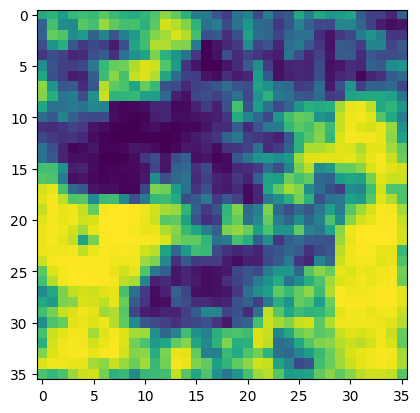

In [10]:
final_img = np.squeeze(conv_outputs[3])

from matplotlib.pyplot import imshow

imshow(final_img)

In [31]:
import tensorflow as tf
import pandas as pd
tf.version
print("# GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU'))) #GPUs

# GPUs Available:  1


In [9]:
print(o)
print(y_test)

[1 0 3 1 2 1 2 3 3 2 3 1 2 0 2 3 2 1 0 1 2 3 1 1 2 1 0 1 1 2 0 3 2 2 0 3 1
 3 2 0 1 3 2 3 2 3 1 2 1 3 1 2 0 2 2 0 1 3 1 3 3 0 1 3 3 3 3 0 0 2 2 1 1 1
 2 0 1 0 0 1 1 0 1 3 3]
[1 0 3 1 2 1 2 3 1 2 3 3 2 0 2 1 2 1 0 1 0 3 1 0 2 1 0 1 1 2 0 3 2 2 0 3 1
 3 2 0 3 3 2 3 2 1 1 2 1 3 3 2 0 2 2 0 1 3 1 1 3 0 3 3 3 3 3 0 0 2 2 1 1 1
 2 0 1 0 0 3 1 0 1 1 0]


In [11]:
!pip install scikit-learn

     ---------------------------------------- 8.3/8.3 MB 24.1 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     --------------------------------------- 42.5/42.5 MB 22.6 MB/s eta 0:00:00
     ------------------------------------- 298.0/298.0 kB 18.0 MB/s eta 0:00:00


In [12]:
import sklearn

In [13]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, o)
print(conf_matrix)

[[16  1  1  1]
 [ 0 20  0  5]
 [ 0  0 20  0]
 [ 0  5  0 16]]


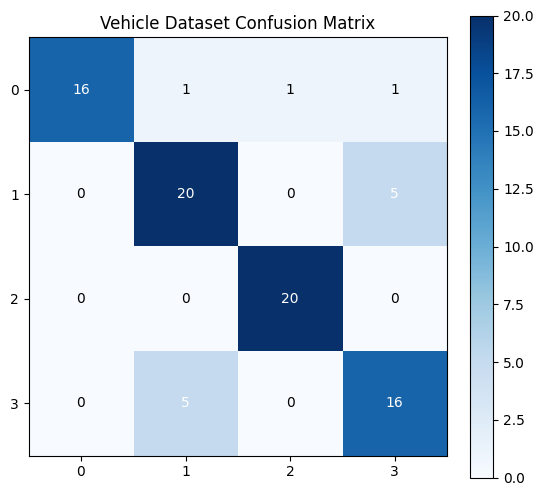

In [20]:
title = 'Vehicle Dataset Confusion Matrix'
cmap=plt.cm.viridis
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.get_cmap('Blues'))  # , cmap=plt.cm.Greens
plt.title(title, size=12)
plt.colorbar(fraction=0.05, pad=0.05)
tick_marks = np.arange(3, 3)
plt.xticks(np.arange(4), ('0', '1', '2', '3'))
plt.yticks(np.arange(4), ('0', '1', '2', '3'))

fmt = 'd' 
thresh = 1
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 ha="center", va="center", color="white" if conf_matrix[i, j] > thresh else "black")  #horizontalalignment